In [ ]:
# NOTES:
# - can files be opened from opendap link (see txt file in HPC dir)

In [1]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [11]:
from palettable.scientific.diverging import Broc_10

In [3]:
def preprocess(ds):

        dsnew = xarray.Dataset(
            {
                "sif": (["time"], ds.Daily_SIF_757nm),
            },
            coords={
                "lon": (["time"], ds.Longitude),
                "lat": (["time"], ds.Latitude),
                "time": ds.Delta_Time.values
            }
        )

        return dsnew

In [4]:
filename = "./tmp/2014/oco2_LtSIF_140906_B10206r_200730212646s.nc4"

with xarray.open_dataset(filename) as ds:
#     time = ds.Delta_Time
#     lat = ds.Latitude
#     lon = ds.Longitude
#     sif = ds.Daily_SIF_757nm
    print(preprocess(ds))
    
# print(sif)

<xarray.Dataset>
Dimensions:  (time: 176422)
Coordinates:
    lon      (time) float32 -179.75006 -179.7583 ... -165.4884 -165.50293
    lat      (time) float32 -19.618774 -19.625916 ... 62.217712 62.23694
  * time     (time) datetime64[ns] 2014-09-06T01:47:00.898437504 ... 2014-09-...
Data variables:
    sif      (time) float32 -0.090768814 0.10644817 ... 0.18840313 -0.04426956


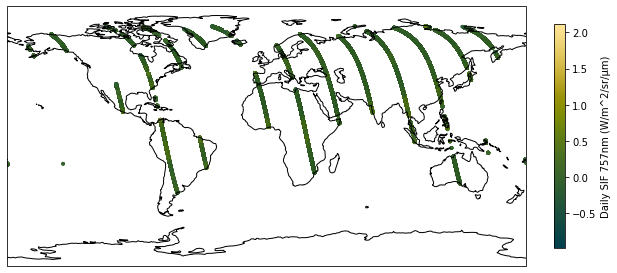

In [89]:
# Plot Daily SIF data
cm = Broc_10.mpl_colormap

fig = plt.figure(figsize=(10,12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()
ax.coastlines()
s = ax.scatter(lon, lat, c=sif, s=8, cmap=cm, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable=s, ax=ax, fraction=0.02, pad=0.05)
cbar.set_label("Daily SIF 757nm (W/m^2/sr/µm)")
# plt.savefig("../plots/daily_sif_demo.png")

In [35]:
# Open multiple datasets across yearly subdirectories
# Concat along lat-lon or time?
import glob
list_of_paths = glob.glob("./tmp/*/*.nc4")

with xarray.open_mfdataset(list_of_paths, preprocess=preprocess) as ds:
#     cm = Broc_10.mpl_colormap

#     fig = plt.figure(figsize=(10,12))
#     ax = plt.axes(projection=ccrs.PlateCarree())

#     ax.set_global()
#     ax.coastlines()
#     s = ax.scatter(ds.lon, ds.lat, c=ds.sif, s=8, cmap=cm, transform=ccrs.PlateCarree())
#     cbar = plt.colorbar(mappable=s, ax=ax, fraction=0.02, pad=0.05)
#     cbar.set_label("Daily SIF 757nm (W/m^2/sr/µm)")
    print(ds.resample(time="1MS").mean())

<xarray.Dataset>
Dimensions:  (time: 68)
Coordinates:
  * time     (time) datetime64[ns] 2014-09-01 2014-10-01 ... 2020-04-01
Data variables:
    sif      (time) float32 0.09324628 nan nan nan ... nan nan nan 0.084574446


/Users/joshjacobson/Projects/sif-data-fusion/conda-env/lib/python3.7/site-packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
